# CNN Image classifier



In [1]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/dataset_images.zip"
extracted_folder_path = "/content/dataset_images"

# Create the folder to extract the contents into
os.makedirs(extracted_folder_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")

File '/content/drive/MyDrive/dataset_images.zip' has been successfully extracted to '/content/dataset_images'.


In [32]:
pip install tensorflow==2.13.0

In [3]:
import os

folder = '/content/dataset_images'

data_set = os.listdir(folder)
data_set

['vehicle-images',
 'graph-images',
 'scenary-images',
 'text-images',
 'human-images',
 'animal-images',
 'object-images']

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [7]:
data = tf.keras.utils.image_dataset_from_directory(folder)

Found 625 files belonging to 7 classes.


In [8]:
# scale data from (0, 255) to (0, 1)

data = data.map(lambda x,y: (tf.image.convert_image_dtype(x, tf.float32)/255, tf.one_hot(y, depth=7)))

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
# Build deep learning model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

In [12]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(7, activation='softmax'))

model.compile(optimizer ='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [14]:
hist = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
14/14 [==============================] - 50s 3s/step - loss: 1.8693 - accuracy: 0.2991 - val_loss: 1.6497 - val_accuracy: 0.3750
Epoch 2/15
14/14 [==============================] - 48s 3s/step - loss: 1.5853 - accuracy: 0.3996 - val_loss: 1.3520 - val_accuracy: 0.5312
Epoch 3/15
14/14 [==============================] - 47s 3s/step - loss: 1.4249 - accuracy: 0.4710 - val_loss: 1.3795 - val_accuracy: 0.5000
Epoch 4/15
14/14 [==============================] - 47s 3s/step - loss: 1.2986 - accuracy: 0.5290 - val_loss: 1.0978 - val_accuracy: 0.6328
Epoch 5/15
14/14 [==============================] - 49s 3s/step - loss: 1.0374 - accuracy: 0.6518 - val_loss: 0.8556 - val_accuracy: 0.7266
Epoch 6/15
14/14 [==============================] - 46s 3s/step - loss: 0.8416 - accuracy: 0.7254 - val_loss: 0.8528 - val_accuracy: 0.7500
Epoch 7/15
14/14 [==============================] - 63s 4s/step - loss: 0.7023 - accuracy: 0.7746 - val_loss: 0.6982 - val_accuracy: 0.7734
Epoch 8/15
14/14 [==

In [15]:
model.save('/content/chart-classifier-m4.keras')

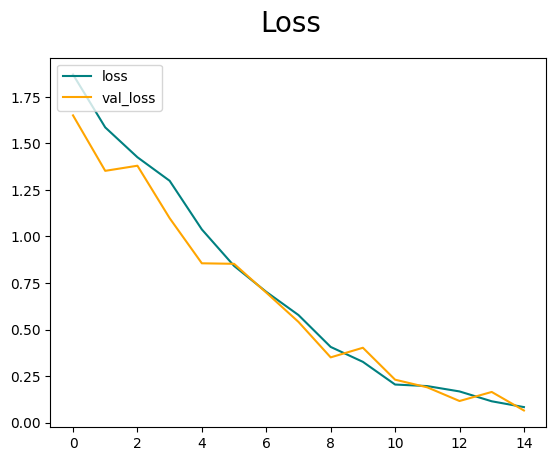

In [16]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

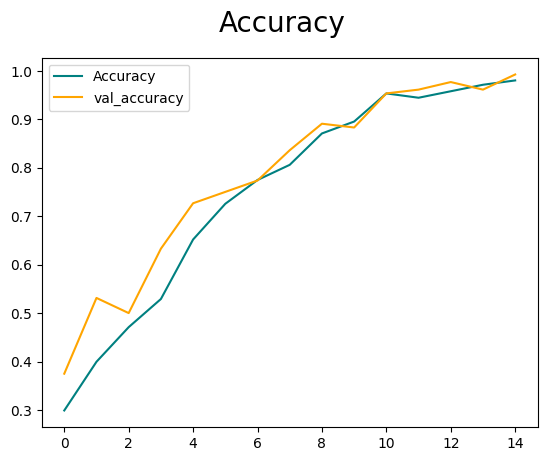

In [17]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
test_results = model.evaluate(test)

# Display the evaluation results
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

2/2 [==============================] - 14s 194ms/step - loss: 0.0511 - accuracy: 1.0000
Test Loss: 0.05112909898161888
Test Accuracy: 1.0


In [20]:
# for flask app
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

model = load_model('/content/chart-classifier-m4.keras')

class_names = {
    'animal': 0,
    'chart': 1,
    'human': 2,
    'objects': 3,
    'scenery': 4,
    'text': 5,
    'vehicle': 6
}

img = cv2.imread('/content/drive/MyDrive/test-chart-image.png')
resize = tf.image.resize(img, (256, 256))
yhat = model.predict(np.expand_dims(resize/255, 0))

predicted_index = np.argmax(yhat)
predicted_class = [key for key, value in class_names.items() if value == predicted_index][0]
yhat_list = yhat.tolist()

print("Predicted Class:", predicted_class)
print("Predicted Percentage:", yhat_list[0][predicted_index])
print("\nAll Predicted Classes:")
for class_name, index in class_names.items():
    percentage = yhat_list[0][index]
    print(f"{class_name}: {percentage}")

1/1 [==============================] - 0s 77ms/step
Predicted Class: chart
Predicted Percentage: 0.6095933318138123

All Predicted Classes:
animal: 0.0013236417435109615
chart: 0.6095933318138123
human: 0.025193875655531883
objects: 0.0666128471493721
scenery: 0.0005377284833230078
text: 0.2965436577796936
vehicle: 0.0001947867131093517


In [21]:
# for flask app
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

model = load_model('/content/chart-classifier-m4.keras')

class_names = {
    'animal': 0,
    'chart': 1,
    'human': 2,
    'objects': 3,
    'scenery': 4,
    'text': 5,
    'vehicle': 6
}

img = cv2.imread('/content/demo_img7.png')
resize = tf.image.resize(img, (256, 256))
yhat = model.predict(np.expand_dims(resize/255, 0))

predicted_index = np.argmax(yhat)
predicted_class = [key for key, value in class_names.items() if value == predicted_index][0]
yhat_list = yhat.tolist()

print("Predicted Class:", predicted_class)
print("Predicted Percentage:", yhat_list[0][predicted_index])
print("\nAll Predicted Classes:")
for class_name, index in class_names.items():
    percentage = yhat_list[0][index]
    print(f"{class_name}: {percentage}")

1/1 [==============================] - 0s 71ms/step
Predicted Class: vehicle
Predicted Percentage: 0.7735357284545898

All Predicted Classes:
animal: 0.000305492605548352
chart: 0.004185797646641731
human: 0.186194509267807
objects: 0.02594287507236004
scenery: 2.509308251319453e-05
text: 0.009810605086386204
vehicle: 0.7735357284545898


In [22]:
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

model = load_model('/content/chart-classifier-m4.keras')

class_names = {
    'animal': 0,
    'chart': 1,
    'human': 2,
    'objects': 3,
    'scenery': 4,
    'text': 5,
    'vehicle': 6
}

img = cv2.imread('/content/code.png')
resize = tf.image.resize(img, (256, 256))
yhat = model.predict(np.expand_dims(resize/255, 0))

predicted_index = np.argmax(yhat)
predicted_class = [key for key, value in class_names.items() if value == predicted_index][0]
yhat_list = yhat.tolist()

print("Predicted Class:", predicted_class)
print("Predicted Percentage:", yhat_list[0][predicted_index])
print("\nAll Predicted Classes:")
for class_name, index in class_names.items():
    percentage = yhat_list[0][index]
    print(f"{class_name}: {percentage}")

1/1 [==============================] - 1s 570ms/step
Predicted Class: text
Predicted Percentage: 0.9811366200447083

All Predicted Classes:
animal: 0.0008425766718573868
chart: 9.843192674452439e-05
human: 1.7828631371230586e-06
objects: 0.0007509177085012197
scenery: 0.0029045604169368744
text: 0.9811366200447083
vehicle: 0.014265150763094425


In [29]:
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt

def load_chart_model(model_path):
    return load_model(model_path)

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256, 256))
    return np.expand_dims(resize/255, 0)

def predict_image_class(model, image):
    yhat = model.predict(image)
    predicted_index = np.argmax(yhat)
    return predicted_index

def get_class_name(class_names, predicted_index):
    return [key for key, value in class_names.items() if value == predicted_index][0]

def get_predicted_percentage(yhat_list, predicted_index):
    return yhat_list[0][predicted_index]

def predict_and_display(img_path, model_path, class_names):
    model = load_chart_model(model_path)
    image = preprocess_image(img_path)
    predicted_index = predict_image_class(model, image)
    predicted_class = get_class_name(class_names, predicted_index)
    yhat_list = model.predict(image).tolist()

    # Plot the image
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    print("Predicted Class:", predicted_class)
    print("Predicted Percentage:", get_predicted_percentage(yhat_list, predicted_index)*100)
    print("\nAll Predicted Classes and their probablities:")

    # Sort classes by percentage in descending order
    sorted_classes = sorted(class_names.items(), key=lambda x: yhat_list[0][x[1]], reverse=True)

    for class_name, index in sorted_classes:
        percentage = yhat_list[0][index]
        print(f"{class_name}: {percentage*100}")

1/1 [==============================] - 0s 27ms/step


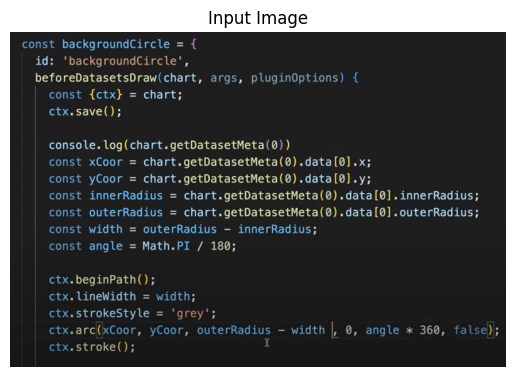

Predicted Class: text
Predicted Percentage: 98.11366200447083

All Predicted Classes and their probablities:
text: 98.11366200447083
vehicle: 1.4265150763094425
scenery: 0.29045604169368744
animal: 0.08425766718573868
objects: 0.07509177085012197
chart: 0.009843192674452439
human: 0.00017828631371230586


In [30]:
# Example Usage
img_path = '/content/code.png'
model_path = '/content/chart-classifier-m4.keras'
class_names = {
    'animal': 0,
    'chart': 1,
    'human': 2,
    'objects': 3,
    'scenery': 4,
    'text': 5,
    'vehicle': 6
}

predict_and_display(img_path, model_path, class_names)

1/1 [==============================] - 0s 42ms/step


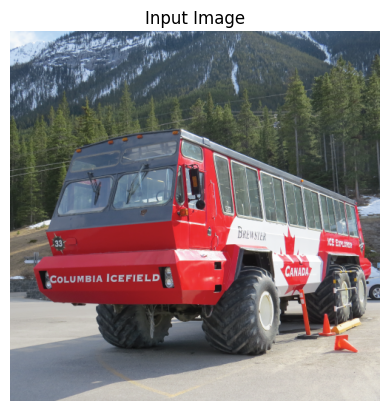

Predicted Class: vehicle
Predicted Percentage: 77.35357284545898

All Predicted Classes and their probablities:
vehicle: 77.35357284545898
human: 18.6194509267807
objects: 2.594287507236004
text: 0.9810605086386204
chart: 0.4185797646641731
animal: 0.0305492605548352
scenery: 0.002509308251319453


In [31]:
# Example Usage
img_path = '/content/demo_img7.png'
model_path = '/content/chart-classifier-m4.keras'
class_names = {
    'animal': 0,
    'chart': 1,
    'human': 2,
    'objects': 3,
    'scenery': 4,
    'text': 5,
    'vehicle': 6
}

predict_and_display(img_path, model_path, class_names)

In [33]:
model.save()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [35]:
import pickle

with open('/content/chart-text-classifier-m1.pkl', 'wb') as file:
    pickle.dump(model, file)

In [37]:
model.save('/content/chart-text-class-m2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
